11501568/11490434 [==============================] - 0s 0us/step


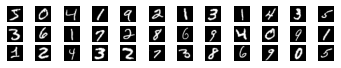

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
his start
Epoch 1/5
6000/6000 [==============================] - 11s 2ms/step - loss: 2.8452 - accuracy: 0.1833
Epoch 2/5
6000/6000 [==============================] - 10s 2ms/step -

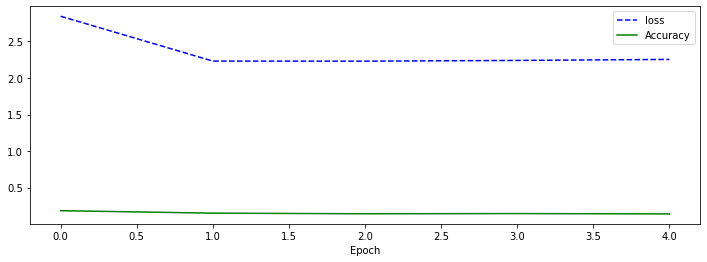

최적화 완료!
313/313 [==============================] - 1s 1ms/step - loss: 2.1846 - accuracy: 0.1592

 Accuracy: 0.1592


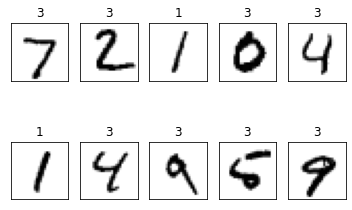

In [1]:
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

(train_image,train_labels),(test_images,test_labels)= tf.keras.datasets.mnist.load_data()


plt.figure(figsize=(6,1))
for i in range(36):
  plt.subplot(3,12,i+1)#그림은 1부터 인덱싱
  plt.imshow(train_image[i],cmap='gray')
  plt.axis('off')#그림 선 생략

plt.show()

train_images=train_image.reshape((60000,784))# 벡터화
test_images=test_images.reshape((10000,784))
train_image,test_images=train_images/255.0,test_images/255.0    #정구화
one_hot_train_labels=to_categorical(train_labels,10)
one_hot_test_labels=to_categorical(test_labels,10)
print(one_hot_train_labels[:10])

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_dim=784,units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

print('his start')
history=model.fit(train_images,one_hot_train_labels,epochs=5,batch_size=10)





plt.figure(figsize=(12,4)) #그래프의 가로세로 비율
plt.subplot(1,1,1) #1행1열의 첫 번째 위치
#loss는 파란색 점선
plt.plot(history.history['loss'], 'b--', label='loss')  #accuracy는 녹색실선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')


labels=model.predict(test_images)
# .evaluate()함수의 반환값: 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
#테스트 영상 중 10개만 출력하고 예측결과를 그림 위에 표시해 보자.
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i].reshape((28, 28)),
  cmap=plt.cm.gray_r)
plt.show()






